In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices
from scipy import stats

### Retrieve Data

In [2]:
gdp_data = pd.read_excel('GDP.xls') 
gdp_data['GDP_L1'] = gdp_data['GDP'].shift(1)
gdp_data['li1_L1'] = gdp_data['li1'].shift(1)
gdp_data['li2_L1'] = gdp_data['li2'].shift(1)
gdp_data['li1_L2'] = gdp_data['li1'].shift(2)
gdp_data['li2_L2'] = gdp_data['li2'].shift(2)
gdp_data['GrowthRate_L1'] = gdp_data['GrowthRate'].shift(1)
gdp_data.head()

,Date,GDP,GDPIMPR,LOGGDP,GrowthRate,li1,li2,T,GDP_L1,li1_L1,li2_L1,li1_L2,li2_L2,GrowthRate_L1
0,1950Q1,94.300,NaN,4.546481,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1950Q2,95.200,1.0,4.555980,0.009499,0,0,1,94.300,0.0,0.0,NaN,NaN,NaN
2,1950Q3,97.663,1.0,4.581523,0.025543,3,1,2,95.200,0.0,0.0,0.0,0.0,0.009499
3,1950Q4,99.728,1.0,4.602446,0.020924,4,2,3,97.663,3.0,1.0,0.0,0.0,0.025543
4,1951Q1,100.445,1.0,4.609610,0.007164,2,1,4,99.728,4.0,2.0,3.0,1.0,0.020924


## Part A

In [3]:
#Setting Start and End For model data
start = '1951Q1'
end = '2010Q4'

In [4]:
data_a = gdp_data[['Date', 'li1_L1', 'li2_L1', 'GDPIMPR']]
data_a = data_a[(data_a['Date']>=start)&(data_a['Date']<=end)]

In [5]:
yA_full, xA_full = dmatrices('GDPIMPR~li1_L1+li2_L1', data_a)

In [6]:
model_A_full = sm.Logit(endog=yA_full, exog=xA_full).fit()
model_A_full.summary2()


Optimization terminated successfully.
         Current function value: 0.559076
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.122     
Dependent Variable: GDPIMPR          AIC:              274.3565  
Date:               2023-09-17 21:52 BIC:              284.7984  
No. Observations:   240              Log-Likelihood:   -134.18   
Df Model:           2                LL-Null:          -152.76   
Df Residuals:       237              LLR p-value:      8.4833e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.7288    0.1536   4.7454  0.0000   0.4278   1.0298
li1_L1        -0.3719    0.0727  -5.1176  0.0000  -0.5143  -0.2294
li2_L1        -0.1203    0.0377  -3.1936  0.0014  -0.1941  -0.0465
=================================================================

"""

In [7]:
yA_li1, xA_li1 = dmatrices('GDPIMPR~li1_L1', data_a)
yA_li2, xA_li2 = dmatrices('GDPIMPR~li2_L1', data_a)

In [8]:
model_A_li1 = sm.Logit(endog=yA_li1, exog=xA_li1).fit()
model_A_li2 = sm.Logit(endog=yA_li2, exog=xA_li2).fit()


Optimization terminated successfully.
         Current function value: 0.582277
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.623002
         Iterations 5


In [9]:
model_A_li1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.085     
Dependent Variable: GDPIMPR          AIC:              283.4932  
Date:               2023-09-17 21:52 BIC:              290.4544  
No. Observations:   240              Log-Likelihood:   -139.75   
Df Model:           1                LL-Null:          -152.76   
Df Residuals:       238              LLR p-value:      3.3552e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.8120    0.1509   5.3831  0.0000   0.5164   1.1077
li1_L1        -0.3404    0.0718  -4.7387  0.0000  -0.4812  -0.1996
=================================================================

"""

In [10]:
model_A_li2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.021   
Dependent Variable: GDPIMPR          AIC:              303.0409
Date:               2023-09-17 21:52 BIC:              310.0022
No. Observations:   240              Log-Likelihood:   -149.52 
Df Model:           1                LL-Null:          -152.76 
Df Residuals:       238              LLR p-value:      0.010874
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept    0.6361    0.1395   4.5613  0.0000   0.3628   0.9094
li2_L1      -0.0865    0.0349  -2.4759  0.0133  -0.1550  -0.0180
===============================================================

"""

In [11]:
# This is in the question table as well.
const_ll = model_A_full.llnull
full_ll = model_A_full.llf
li1_ll = model_A_li1.llf
li2_ll = model_A_li2.llf


In [12]:
def likelihood_ratio(logL_b0, llgL_b1):
    return 2.0*(logL_b0- llgL_b1)

In [13]:
logL_ratio_li1 = likelihood_ratio(full_ll,li1_ll)
logL_ratio_li2 = likelihood_ratio(full_ll,li2_ll)
logL_ratio_const = likelihood_ratio(full_ll, const_ll)


In [14]:
logL_ratio_li1, logL_ratio_li2, logL_ratio_const

(11.136692691751932, 30.68446592235142, 37.17033387318395)

In [15]:
#The chi-squared probability of getting a log-likelihood ratio statistic greater than llr. 
#llr has a chi-squared distribution with degrees of freedom df_model.
model_A_li1.llr_pvalue, model_A_li2.llr_pvalue,  model_A_full.llr_pvalue

(3.355197087485361e-07, 0.01087354332878751, 8.483294700541989e-09)

###  Summary Answer A

In [16]:
print("Answer A:")
print(f"Likelihood Ratio of li1 is {round(logL_ratio_li1, 3)}, p_value of the model with li1 is {round(model_A_li1.llr_pvalue, 3)}")
print(f"Likelihood Ratio of li2 is {round(logL_ratio_li2,3)}, p_value of the model with li2 is {round(model_A_li2.llr_pvalue, 3)}")
print(f"Likelihood Ratio of constant is {round(logL_ratio_const , 3)}")
print(f"p_value of the full model with li1 and li2 is {round(model_A_full.llr_pvalue, 3)}")
print(f"Based on the p-vlaues, full model and li1 model are significant at 1% level and li2 model is significant at 5% level.")


Answer A:
Likelihood Ratio of li1 is 11.137, p_value of the model with li1 is 0.0
Likelihood Ratio of li2 is 30.684, p_value of the model with li2 is 0.011
Likelihood Ratio of constant is 37.17
p_value of the full model with li1 and li2 is 0.0
Based on the p-vlaues, full model and li1 model are significant at 1% level and li2 model is significant at 5% level.


## Part B

In [17]:
# From the question we can get the likelihood of each model
const_ll = -152.763
model1_ll = -134.178
model2_ll = -134.126
model3_ll = -130.346
model4_ll = -130.461


In [18]:
def McFadden_R2(logL_b, logL_b1):
    return 1 - logL_b/logL_b1

In [19]:
Model_McFadden_R2 = []
for i in [model1_ll, model2_ll, model3_ll, model4_ll]:
    Model_McFadden_R2.append(McFadden_R2(i, const_ll))

In [20]:
Model_MFR2_df = pd.DataFrame(np.array([Model_McFadden_R2]), columns = ["model1", "model2", "model3", "model4"])

In [21]:
Model_MFR2_df

,model1,model2,model3,model4
0,0.121659,0.121999,0.146744,0.145991


### Summary Answer B

In [22]:
print("Based on the McFadden_R2, the optimal model is model 3, which uses constatnt + li1(-2) + li2(-1).")

Based on the McFadden_R2, the optimal model is model 3, which uses constatnt + li1(-2) + li2(-1).


## Part C

In [23]:
data_c = gdp_data[['Date', 'li1_L2', 'li2_L1', 'GDPIMPR']]
train_c = data_c[(data_c['Date']>=start)&(data_c['Date']<=end)]
predict_c = data_c[data_c['Date']>end]

In [24]:
yC_train, xC_train = dmatrices('GDPIMPR~li1_L2+li2_L1', train_c)
yC_target, xC_predict = dmatrices('GDPIMPR~li1_L2+li2_L1', predict_c)


In [25]:
model_C = sm.Logit(endog=yC_train, exog=xC_train).fit()
model_C.summary2()

Optimization terminated successfully.
         Current function value: 0.543106
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.147     
Dependent Variable: GDPIMPR          AIC:              266.6909  
Date:               2023-09-17 21:52 BIC:              277.1328  
No. Observations:   240              Log-Likelihood:   -130.35   
Df Model:           2                LL-Null:          -152.76   
Df Residuals:       237              LLR p-value:      1.8366e-10
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.7457    0.1573   4.7397  0.0000   0.4373   1.0540
li1_L2        -0.4287    0.0763  -5.6175  0.0000  -0.5783  -0.2791
li2_L1        -0.1312    0.0386  -3.3994  0.0007  -0.2068  -0.0556
=================================================================

"""

In [26]:
prediction_C = model_C.predict(xC_predict)
pred_table_C = model_C.pred_table(threshold=0.5) # This is for logistic regrestion threshold to determie 0 or 1.

In [27]:
pred_logit= [1 if i > 0.5 else 0 for i in prediction_C]

In [28]:
pred_table_C = [[0,0], [0, 0]]
for i in range(len(pred_logit)):
    if pred_logit[i] == 0 and yC_target[i] == 0:
        pred_table_C[0][0]+=1
    elif pred_logit[i] == 0 and yC_target[i] == 1:
        pred_table_C[0][1]+=1
    elif pred_logit[i] == 1 and yC_target[i] == 0:
        pred_table_C[1][0]+=1
    else:
        pred_table_C[1][1]+=1
        

In [29]:
pred_table_C = np.array(pred_table_C)

In [30]:
pred_ratio = pred_table_C/pred_table_C.sum()
r_sum = np.sum(pred_table_C, axis=1)

In [31]:
pred_rtable = pd.DataFrame(pred_ratio, columns=["y_hat=0", "y_hat=1"])
pred_rtable["Sum"] = r_sum
pred_rtable.index = ['y=0', 'y=1']
hit_rate = pred_ratio[0][0] + pred_ratio[1][1]

### Summary Answer C

In [32]:
print("Prediction Realization Model.")
print(pred_rtable)
print(f"hit rate is {round(hit_rate, 5)}")

Prediction Realization Model.
     y_hat=0  y_hat=1  Sum
y=0     0.25     0.15    8
y=1     0.10     0.50   12
hit rate is 0.75


## Part D

In [33]:
data_d = gdp_data[['Date', 'LOGGDP']]
xD = data_d[(data_d['Date']>=start)&(data_d['Date']<=end)]

In [34]:
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
loggdp_ADF = sm.tsa.stattools.adfuller(xD['LOGGDP'], maxlag=1, autolag=None, regression='ct', regresults=True)

In [35]:
adf_statistic = loggdp_ADF[0]
p_value = loggdp_ADF[1]
Critical_values = loggdp_ADF[2]
loggdp_model = loggdp_ADF[3].resols
adf_summary = loggdp_ADF[3].resols.summary2(xname=['LOGGDP Lag=1', 'Delta LOGGDP Lag=1', 'Constant', 'Trend'])

In [36]:
loggdp_params = pd.DataFrame(np.array([loggdp_model.params]), columns=['LOGGDP Lag=1', 'Delta LOGGDP Lag=1', 'Constant', 'Trend'])

In [37]:
adf_summary

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.393     
Dependent Variable: y                AIC:                -1888.3395
Date:               2023-09-17 21:52 BIC:                -1874.4504
No. Observations:   238              Log-Likelihood:     948.17    
Df Model:           3                F-statistic:        52.20     
Df Residuals:       234              Prob (F-statistic): 7.23e-26  
R-squared:          0.401            Scale:              2.0630e-05
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
LOGGDP Lag=1        -0.0204   0.0081 -2.5182 0.0125 -0.0364 -0.0044
Delta LOGGDP Lag=1   0.6325   0.0509 12.4338 0.0000  0.5323  0.7328
Constant             0.0956   0.0375  2.5512 0.0114  0.0218  0.1695
Trend                0.0001   0.0000  2.4979 0.0132  0.0000  0.0001
-------------------------------------------------------------------
Omnibus:              23.009        Durbin-Watson:           2.012 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        36.479
Skew:                 0.578         Prob(JB):                0.000 
Kurtosis:             4.530         Condition No.:           23965 
===================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

### Summary Answer D

In [38]:
print('ADF Test:')
print(f"The coefficients are shown in table")
print(loggdp_params)
print(f"The test statistic is {round(adf_statistic, 5)}")
print(f"Confidence Level is {Critical_values}.")
print(f"P-Value is {round(p_value, 5)}, which is away from 10% level of significance.")

ADF Test:
The coefficients are shown in table
   LOGGDP Lag=1  Delta LOGGDP Lag=1  Constant     Trend
0     -0.020406            0.632529  0.095629  0.000064
The test statistic is -2.51821
Confidence Level is {'1%': -3.9973200578432064, '5%': -3.4290999471622556, '10%': -3.1379848180498104}.
P-Value is 0.31892, which is away from 10% level of significance.


In [39]:
gdp_data.head()

,Date,GDP,GDPIMPR,LOGGDP,GrowthRate,li1,li2,T,GDP_L1,li1_L1,li2_L1,li1_L2,li2_L2,GrowthRate_L1
0,1950Q1,94.300,NaN,4.546481,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1950Q2,95.200,1.0,4.555980,0.009499,0,0,1,94.300,0.0,0.0,NaN,NaN,NaN
2,1950Q3,97.663,1.0,4.581523,0.025543,3,1,2,95.200,0.0,0.0,0.0,0.0,0.009499
3,1950Q4,99.728,1.0,4.602446,0.020924,4,2,3,97.663,3.0,1.0,0.0,0.0,0.025543
4,1951Q1,100.445,1.0,4.609610,0.007164,2,1,4,99.728,4.0,2.0,3.0,1.0,0.020924


## Part E

In [40]:
data_e = gdp_data[['Date', 'GrowthRate', 'GrowthRate_L1', 'li1_L1', 'li1_L2', 'li2_L1', 'li2_L2']]
data_e.dropna(inplace=True)
data_e= data_e[(data_e['Date']>=start)&(data_e['Date']<=end)]

C:\Users\14699\AppData\Local\Temp\ipykernel_28388\76639727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_e.dropna(inplace=True)


In [41]:
yE_v1, xE_v1 = dmatrices("GrowthRate ~ GrowthRate_L1 + li1_L1 + li2_L1", data_e)
yE_v2, xE_v2 = dmatrices("GrowthRate ~ GrowthRate_L1 + li1_L2 + li2_L1", data_e)
yE_v3, xE_v3 = dmatrices("GrowthRate ~ GrowthRate_L1 + li1_L1 + li2_L2", data_e)
yE_v4, xE_v4 = dmatrices("GrowthRate ~ GrowthRate_L1 + li1_L2 + li2_L2", data_e)


In [42]:
model_e_v1 = sm.OLS(yE_v1, xE_v1).fit()
model_e_v2 = sm.OLS(yE_v2, xE_v2).fit()
model_e_v3 = sm.OLS(yE_v3, xE_v3).fit()
model_e_v4 = sm.OLS(yE_v4, xE_v4).fit()

In [43]:
model_e_rsqured = [model_e_v1.rsquared, model_e_v2.rsquared, model_e_v3.rsquared, model_e_v4.rsquared]
model_e_df = pd.DataFrame(np.array([model_e_rsqured]), 
        columns=["k1=k2=1", "k1=2, k2=1", "k1=1, k2=2", "k1=k2=2"])
model_e_df.index = ["R_Square"]
model_e_v1_params = pd.DataFrame(np.array([np.around(model_e_v1.params, 6)]), columns = ["Constant", "GrowthRate_L1", "li1_L1", "li2_L1"])

### Summary  Answer E

In [44]:
print("R Square of 4 models are shown as below:")
print(model_e_df)
print("We can see model with li1 Lag = 1 and li2 Lag =1 has the largest r square.")
print("The Coefficients of this model are:")
print(model_e_v1_params)

R Square of 4 models are shown as below:
           k1=k2=1  k1=2, k2=1  k1=1, k2=2  k1=k2=2
R_Square  0.507975    0.477193    0.507665  0.47713
We can see model with li1 Lag = 1 and li2 Lag =1 has the largest r square.
The Coefficients of this model are:
   Constant  GrowthRate_L1    li1_L1    li2_L1
0  0.001737       0.461579 -0.001023 -0.000149


## Part F

### Breusch-Godfrey
- Test if residual is autocorrelated or white noise.
- https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.acorr_breusch_godfrey.html

In [45]:
model_BG = sm.stats.diagnostic.acorr_breusch_godfrey(model_e_v1, nlags=1, store=True)

In [46]:
BG_params = model_BG[:4]
BG_df = pd.DataFrame(np.array([BG_params]), columns=["BG Statistic", "BG P-value", "BG F-value", "P-Value of f-test"])
BG_df.index = ["BG Test Result"]

In [47]:
model_BG[4].resols.summary2()

f:\anaconda3\envs\statarb\Lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     -0.016    
Dependent Variable: y                AIC:                -1950.9195
Date:               2023-09-17 21:52 BIC:                -1933.5163
No. Observations:   240              Log-Likelihood:     980.46    
Df Model:           4                F-statistic:        0.05645   
Df Residuals:       235              Prob (F-statistic): 0.994     
R-squared:          0.001            Scale:              1.6915e-05
----------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
----------------------------------------------------------------------
const    -0.0000      0.0002    -0.2443    0.8072    -0.0004    0.0003
x1        0.0259      0.0728     0.3552    0.7228    -0.1176    0.1694
x2        0.0000      0.0001     0.1864    0.8523    -0.0003    0.0003
x3        0.0000      0.0001     0.0315    0.9749    -0.0001    0.0001
x4       -0.0000      0.0002    -0.2443    0.8072    -0.0004    0.0003
x5       -0.0467      0.0983    -0.4752    0.6351    -0.2403    0.1469
-------------------------------------------------------------------
Omnibus:              24.227        Durbin-Watson:           2.001 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        35.675
Skew:                 0.633         Prob(JB):                0.000 
Kurtosis:             4.402         Condition No.:           inf   
===================================================================
* The condition number is large (inf). This might indicate
strong multicollinearity or other numerical problems.
"""

### Summary  Answer F

In [48]:
print(f"Based on Breuch-Godfrey test: ")
print("given high p-value, we cannot reject null hypothesis that there is no autocorrelation of residual.")
print("Therefore, there is no misspecification.")

Based on Breuch-Godfrey test: 
given high p-value, we cannot reject null hypothesis that there is no autocorrelation of residual.
Therefore, there is no misspecification.


## Part G

In [49]:
data_g = gdp_data[['Date', 'GrowthRate', 'GrowthRate_L1', 'li1_L1', 'li2_L1']]
train_g= data_g[(data_g['Date']>=start)&(data_g['Date']<=end)]
test_g = data_g[data_g['Date']>end]
test_g.set_index("Date", inplace=True)

In [50]:
def rmse(pred, target):
    diff_sq = (np.array(pred)-np.array(target))**2
    ret = np.sqrt(diff_sq.mean())
    return ret

In [51]:
yG_target, xG_test = dmatrices("GrowthRate ~ GrowthRate_L1 + li1_L1 + li2_L1", test_g)

In [52]:
yG_pred = model_e_v1.predict(xG_test)

In [53]:
model_rmse = rmse(yG_pred, yG_target)

In [54]:
pred_df = pd.DataFrame(yG_pred, columns = ["y_pred"], index = test_g.index)


In [55]:
pred_df["y_target"] = yG_target

### Summary Answer G

root mean square error for these forcast is 0.007383.
Graph is shown in below:


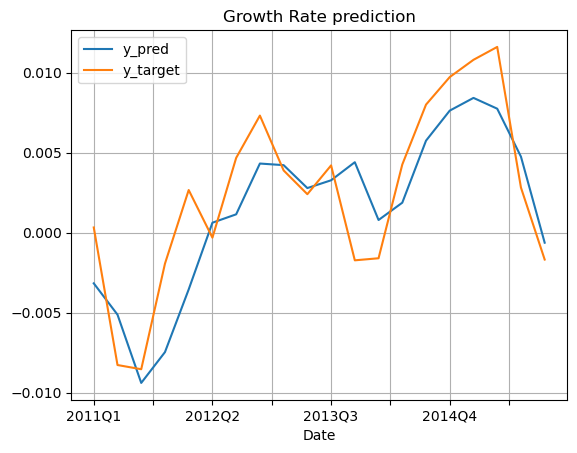

In [56]:
print(f"root mean square error for these forcast is {round(model_rmse, 6)}.")
print("Graph is shown in below:")
fig, ax = plt.subplots(1,1)
pred_df.plot(ax=ax, title="Growth Rate prediction")
ax.grid()